# <p style="text-align: center;">Direct solver comparison in OGS</p>

## Machine: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz

## Model: ThermoRichardsMechanics (2D) 3463 nodes 10 time steps

In [8]:
from ogs6py.ogs import OGS
import numpy as np
import matplotlib.pyplot as plt
import plot_settings

In [9]:
runs = 10

In [10]:
folder= "/home/buchwalj/OGS_Solver_Comparison/data/sims"

In [11]:
solvers = ["Eigen/SparseLU","PETSc/SuperLU", "PETSc/MUMPS", "Eigen/PardisoLU", "PETSc/PardisoLU"]

In [12]:
def setSolver(fileobject, solver):
    if solver == "Eigen/SparseLU":
        fileobject.replace_text("SparseLU", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.write_input()
        fileobject.run_model(path="/home/buchwalj/github/ogs/build_mkl/bin", logfile=f"{folder}/sparselu.out")
        exec_time = fileobject.exec_time
    elif solver == "Eigen/PardisoLU":
        fileobject.replace_text("PardisoLU", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.write_input()
        fileobject.run_model(path="/home/buchwalj/github/ogs/build_mkl/bin", logfile=f"{folder}/pardisolueigen.out")
    elif solver == "PETSc/SuperLU":
        fileobject.replace_text("-hc_mat_type aij -hc_pc_type lu -hc_pc_factor_mat_solver_type superlu_dist -hc_ksp_view", xpath="./linear_solvers/linear_solver/petsc/parameters")
        fileobject.write_input()
        fileobject.run_model(path="/home/buchwalj/github/ogs/build_mkl_petsc/bin", logfile=f"{folder}/superlu.out")
    elif solver == "PETSc/MUMPS":
        fileobject.replace_text("-hc_mat_type aij -hc_pc_type lu -hc_pc_factor_mat_solver_type mumps -hc_ksp_view", xpath="./linear_solvers/linear_solver/petsc/parameters")
        fileobject.write_input()
        fileobject.run_model(path="/home/buchwalj/github/ogs/build_mkl_petsc/bin", logfile=f"{folder}/mumps.out")
    elif solver == "PETSc/PardisoLU":
        fileobject.replace_text("-hc_mat_type aij -hc_pc_type lu -hc_pc_factor_mat_solver_type mkl_pardiso -hc_ksp_view", xpath="./linear_solvers/linear_solver/petsc/parameters")
        fileobject.write_input()
        fileobject.run_model(path="/home/buchwalj/github/ogs/build_mkl_petsc/bin", logfile=f"{folder}/pardisolupetsc.out")
    exec_time = fileobject.exec_time
    return exec_time

In [13]:
exec_time = {}
for solver in solvers:
    exec_time[solver] = []
    for i in range(runs):
        solver_ = solver.split("/")[-1]
        m = OGS(INPUT_FILE=f"{folder}/Decovalex-0.prj", PROJECT_FILE=f"{folder}/{solver_}.prj", MKL=True, OMP_NUM_THREADS=4)
        exec_time[solver].append(setSolver(m, solver))

OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 50.49041128158569 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 52.98560833930969 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 53.14775562286377 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 51.196815729141235 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 52.7239305973053 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 51.69897508621216 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 51.90738081932068 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 52.1

In [21]:
np.mean(exec_time['Eigen/SparseLU'])

51.85056071281433

In [23]:
np.sum(exec_time[solver])/runs

6.977639436721802

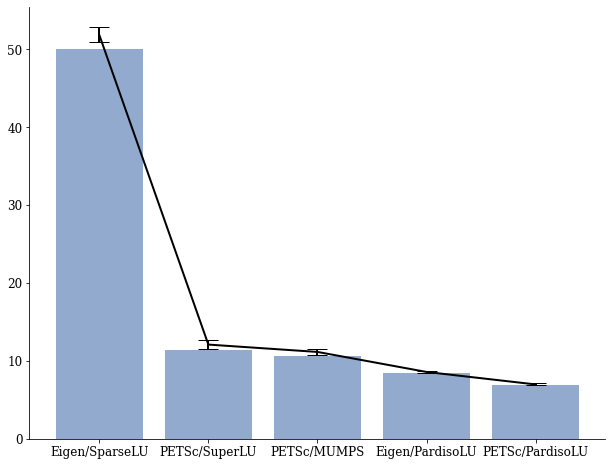

In [36]:
fig = plt.figure()
plt.rcParams.update({'font.size': 12})
ax = fig.add_axes([0,0,1,1])
ax.bar(solvers,[np.min(exec_time[solver]) for solver in solvers], alpha=0.6)
plt.errorbar(solvers, [np.mean(exec_time[solver]) for solver in solvers], yerr=[np.std(exec_time[solver]) for solver in solvers], color="black", capsize=10)
plt.show()

In [15]:
[np.sum(exec_time[solver])/runs for solver in solvers]

[51.85056071281433,
 12.095569610595703,
 11.15082859992981,
 8.580512809753419,
 6.977639436721802]